In [51]:
#import Libraries
import pandas as pd
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import re
import string
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load the Excel file
file_path = "Sample 1.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1")
df.head()

,Reason/Purpose,Status Reason,Priority,CRM Type,Type Description
0,Wrong Product Selection or Loading,Valid Complaint/شكوى صحيحة,Normal,Complaint,Wrong Product Selection or Loading
1,Amount not Credited,Valid Case - Refund Approved/ موافقة على الاست...,Normal,Complaint,Amount not Credited
2,Rain Issue,Valid Request/طلب صحيح,Normal,Request,Service Enhancement Request
3,Amount not Credited,Valid 12aed approved by AMCE,Normal,Complaint,Amount not Credited
4,Passengers Inspection and Control,Invalid,Normal,Request,Passengers Inspection and Control


In [3]:
df.columns

Index(['Reason/Purpose ', 'Status Reason ', 'Priority', 'CRM Type',
       'Type Description'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1788 entries, 0 to 1787
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Reason/Purpose    1788 non-null   object
 1   Status Reason     1788 non-null   object
 2   Priority          1788 non-null   object
 3   CRM Type          1788 non-null   object
 4   Type Description  1788 non-null   object
dtypes: object(5)
memory usage: 70.0+ KB


In [5]:
df.describe()

,Reason/Purpose,Status Reason,Priority,CRM Type,Type Description
count,1788,1788,1788,1788,1788
unique,78,75,3,5,45
top,Amount not Credited,Invalid Complaint/شكوى غير صحيحة,Normal,Complaint,Amount not Credited
freq,411,474,1722,1350,410


In [6]:
# Function to perform sentiment analysis using TextBlob
def get_sentiment(text):
    if pd.isna(text) or not isinstance(text, str):
        return "Neutral"
    
    sentiment_score = TextBlob(text).sentiment.polarity
    
    if sentiment_score > 0:
        return "Positive"
    elif sentiment_score < 0:
        return "Negative"
    else:
        return "Neutral"
# Apply sentiment analysis on the complaint descriptions
df["Sentiment"] = df["Type Description"].apply(get_sentiment)
df["Sentiment"]

0       Negative
1        Neutral
2        Neutral
3        Neutral
4        Neutral
          ...   
1783    Negative
1784     Neutral
1785    Positive
1786     Neutral
1787    Negative
Name: Sentiment, Length: 1788, dtype: object

In [7]:
# Basic Data Overview
num_complaints = df.shape[0]  
num_complaints
missing_values = df.isnull().sum()  # Missing values per column
missing_values

Reason/Purpose      0
Status Reason       0
Priority            0
CRM Type            0
Type Description    0
Sentiment           0
dtype: int64

In [8]:
# Complaint Type Distribution
complaint_type_counts = df["Type Description"].value_counts().head(10)  
print(complaint_type_counts)
# Sentiment Distribution
sentiment_counts = df["Sentiment"].value_counts()
print(sentiment_counts)

Type Description
Amount not Credited                   410
Staff Conduct                         201
Fine Objection                        200
Overcharge                            174
Service Enhancement Request           172
Wrong Product Selection or Loading    170
Not Giving The Right Money Change     122
Passengers Inspection and Control      89
Activation Delay                       49
Items Dropped On Track                 29
Name: count, dtype: int64
Sentiment
Neutral     1285
Positive     322
Negative     181
Name: count, dtype: int64


In [9]:
# Word Frequency Analysis
all_words = " ".join(df["Type Description"].dropna().astype(str))  
word_counts = Counter(all_words.split())  
print(word_counts)
common_words = word_counts.most_common(10)  
print(common_words)


Counter({'Amount': 410, 'not': 410, 'Credited': 410, 'Staff': 203, 'Conduct': 201, 'Fine': 200, 'Objection': 200, 'Request': 196, 'or': 184, 'Service': 184, 'Wrong': 176, 'Product': 175, 'Overcharge': 174, 'Enhancement': 172, 'Selection': 170, 'Loading': 170, 'Not': 141, 'The': 130, 'Money': 128, 'Giving': 122, 'Right': 122, 'Change': 122, 'and': 99, 'Passengers': 94, 'Control': 90, 'Inspection': 89, 'Activation': 49, 'Delay': 49, 'Items': 29, 'Dropped': 29, 'On': 29, 'Track': 29, 'Appreciation': 26, 'Problem': 26, 'Airconditioning': 25, 'of': 21, 'Lack': 18, 'Card': 16, 'Ticket': 16, 'Technical': 15, 'Support': 15, 'Nol': 13, 'Dispensed': 13, 'Payment': 9, 'cleanliness': 7, 'Out': 7, 'Of': 7, 'Stuck': 6, 'Reverse': 6, 'information/sign': 6, 'boards': 6, 'Safety': 6, 'Defected': 5, 'Announcement': 5, 'issues': 5, 'Security': 5, 'Around': 5, 'Station': 5, 'Delayed': 5, 'Doors': 4, 'Issue': 4, 'Toilet': 3, 'Cleanliness': 3, 'Travel': 3, 'Pass': 3, 'Fare': 3, 'Related': 3, 'Adhering': 3, 

C:\Users\Dell\AppData\Local\Temp\ipykernel_7504\2688203967.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=["green", "red", "gray"])


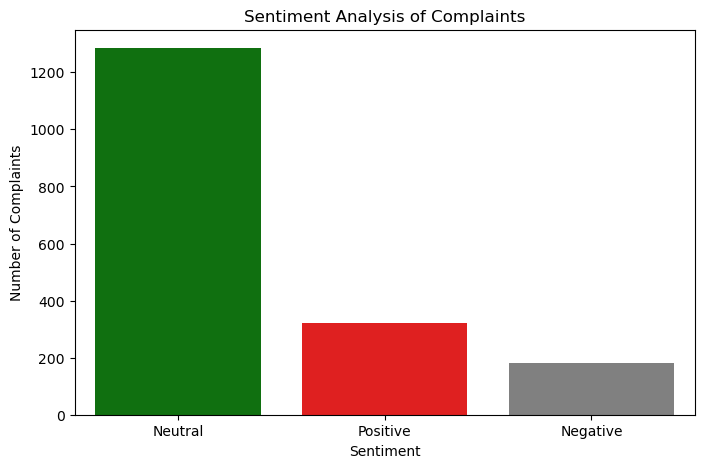

In [10]:
# Plot sentiment distribution (Bar Chart)
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=["green", "red", "gray"])
plt.title("Sentiment Analysis of Complaints")
plt.xlabel("Sentiment")
plt.ylabel("Number of Complaints")
plt.show()


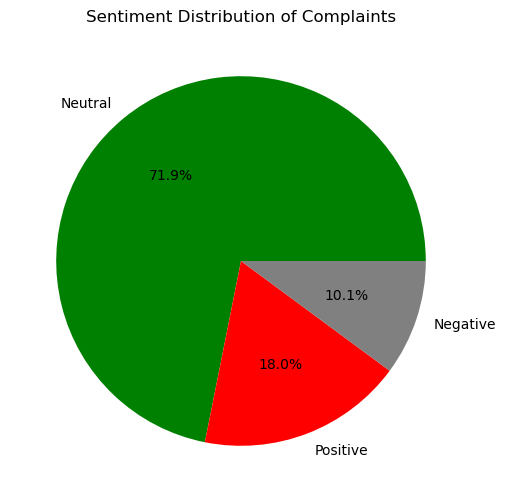

In [11]:
# Plot sentiment distribution (Pie Chart)
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct="%1.1f%%", colors=["green", "red", "gray"])
plt.title("Sentiment Distribution of Complaints")
plt.show()

In [12]:
# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_words)
print(wordcloud)

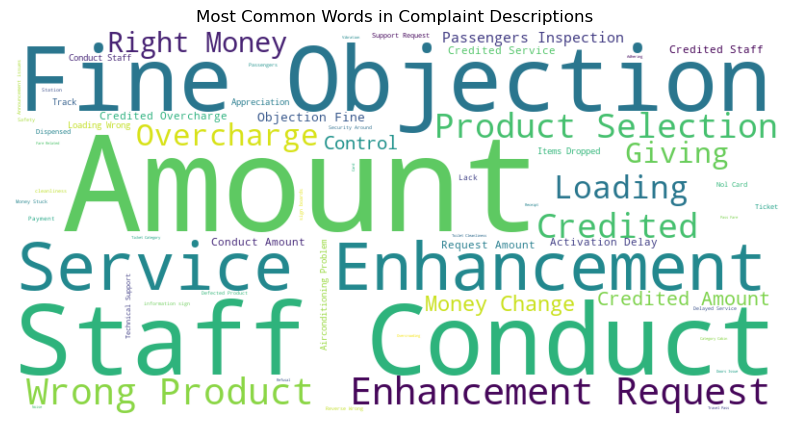

In [13]:
# Plot Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Complaint Descriptions")
plt.show()

In [14]:
# Display first few rows with sentiment classification
print(df[["Type Description", "Sentiment"]].head(10))

                      Type Description Sentiment
0   Wrong Product Selection or Loading  Negative
1                  Amount not Credited   Neutral
2          Service Enhancement Request   Neutral
3                  Amount not Credited   Neutral
4    Passengers Inspection and Control   Neutral
5                  Amount not Credited   Neutral
6                        Staff Conduct   Neutral
7                  Amount not Credited   Neutral
8                  Amount not Credited   Neutral
9                  Amount not Credited   Neutral


In [15]:
#Rename column if necessary
if "Type Description" in df.columns:
    df.rename(columns={"Type Description": "Complaint_Text"}, inplace=True)

# Drop missing values
df.dropna(subset=["Complaint_Text"], inplace=True)


In [16]:
# Define sentiment mapping function
def get_sentiment(text):
    from textblob import TextBlob
    sentiment_score = TextBlob(text).sentiment.polarity
    return "Positive" if sentiment_score > 0 else "Negative" if sentiment_score < 0 else "Neutral"

# Apply sentiment analysis
df["Sentiment"] = df["Complaint_Text"].apply(get_sentiment)

# Display class distribution
print("Class Distribution:\n", df["Sentiment"].value_counts())



Class Distribution:
 Sentiment
Neutral     1285
Positive     322
Negative     181
Name: count, dtype: int64


In [17]:
# Remove Neutral class if needed
df = df[df["Sentiment"] != "Neutral"]

# Encode labels (Positive = 1, Negative = 0)
df["Sentiment_Label"] = df["Sentiment"].map({"Positive": 1, "Negative": 0})

# Check again after removing neutrals
print("Updated Class Distribution:\n", df["Sentiment_Label"].value_counts())

Updated Class Distribution:
 Sentiment_Label
1    322
0    181
Name: count, dtype: int64


In [18]:
# Text Cleaning Function
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\[.*?\]', '', text)  # Remove brackets
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'<.*?>+', '', text)  # Remove HTML tags
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuation
    text = re.sub(r'\n', '', text)  # Remove newlines
    text = re.sub(r'\w*\d\w*', '', text)  # Remove words with numbers
    return text

# Apply text cleaning
df["Cleaned_Text"] = df["Complaint_Text"].apply(clean_text)

# Split dataset
X = df["Cleaned_Text"]
y = df["Sentiment_Label"]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Convert text into numerical format using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = model.predict(X_test_tfidf)

# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        65

    accuracy                           1.00       101
   macro avg       1.00      1.00      1.00       101
weighted avg       1.00      1.00      1.00       101



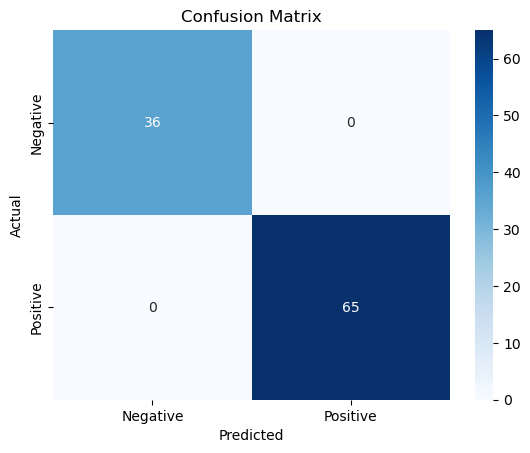

In [20]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_7504\1030413620.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Sentiment"], palette=["red", "green"])


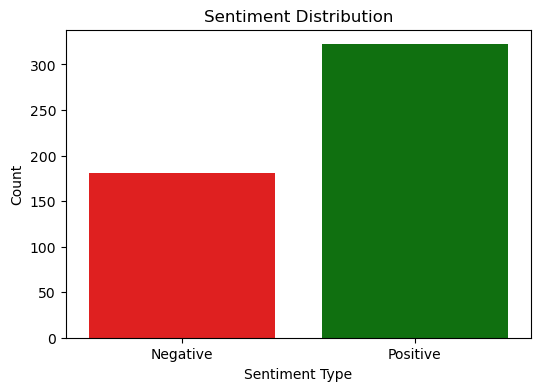

In [21]:
# Sentiment Distribution Bar Chart
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Sentiment"], palette=["red", "green"])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment Type")
plt.ylabel("Count")
plt.show()

In [22]:
# Generate Word Cloud
all_words = " ".join(df["Cleaned_Text"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_words)

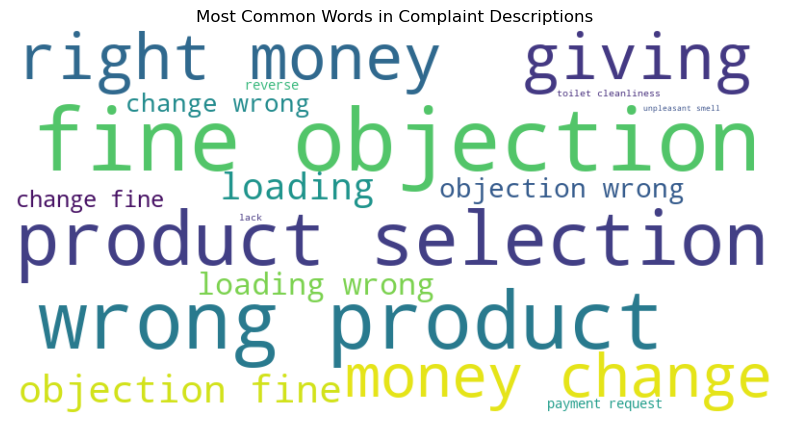

In [23]:
# Plot Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Complaint Descriptions")
plt.show()

In [24]:
# Descriptive Statistics Table

sentiment_summary = df.groupby("Sentiment").agg(
    Count=("Sentiment", "count"),
    Avg_Text_Length=("Complaint_Text", lambda x: np.mean(x.str.len()))
)
print("\nSentiment Summary Statistics:\n", sentiment_summary)


Sentiment Summary Statistics:
            Count  Avg_Text_Length
Sentiment                        
Negative     181        34.502762
Positive     322        22.198758


In [25]:
# Display first few rows with predictions
df_sample = df[["Complaint_Text", "Sentiment"]].sample(5)
print("\nSample Complaints and Sentiments:\n", df_sample)


Sample Complaints and Sentiments:
                           Complaint_Text Sentiment
486                       Fine Objection  Positive
485    Not Giving The Right Money Change  Positive
533    Not Giving The Right Money Change  Positive
509   Wrong Product Selection or Loading  Negative
694                       Fine Objection  Positive
